## Логистическая регрессия

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Плюсы и минусы метода логистической регрессии

**Плюсы**

* Простой метод
* Показывают хорошие результаты, когда данные линейно разделимы
* Более устойчивый к выбросам, чем LDA

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные (но можно попытаться расширить пространство признаков)
* Работают только с числовыми признаками
* Не работают напрямую с пропущенными значениями

## Логистическая регрессия для $K$ классов


Пусть

$$
{\rm Pr}(Y=k \mid X=x) = \frac{e^{\beta_{k0} + \beta_{k1} x_1 + \dots + \beta_{kd} x_d}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell 1} x_1 + \dots + \beta_{\ell d} x_d}} 
=
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K)
$$

Преобразуем и переобозначим:

$$
{\rm Pr}(Y=k \mid X=x) = 
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K-1),
\qquad
{\rm Pr}(Y=K \mid X=x) = 
\frac{1}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
$$

Разделяющие поверхности линейные:

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=K \mid X=x) 
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = 1
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = 0
$$

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=k' \mid X=x)
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = e^{\beta_{k'0} + \beta_{k'}^{\rm T} x}
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = \beta_{k'0} + \beta_{k'}^{\rm T} x
$$


В логистической регрессии параметры обычно подбираются с помощью метода максимального правдоподобия. 

_Логарифмическая функция правдоподобия_
$$
\ell(\beta) = \sum_{i=1}^N \ln {\rm Pr}\{Y = y^{(i)} \mid X = x^{(i)}, \beta\} \to \max,
$$
где
$$
\beta = (\beta_{10},\beta_1,\beta_{20},\beta_2,\dots,\beta_{K-1,0},\beta_{K-1}),
\quad
\Pr(Y = k\mid X = x, \beta) = \Pr(Y=k\mid X=x).
$$


Подробно рассмотрим случай $K=2$: ${\cal Y} =\{0,1\}$.


$$
g(x,\beta) = \Pr\{Y = 1\mid X = x, \beta\} = \frac{1}{1+e^{-\beta_0 - \beta^{\rm T} x}}.
$$

Требуется максимизировать логарифмическую функцию правдоподобия 
$$
\ell(\beta) = \sum_{i=1}^N \Bigl( y^{(i)} \ln g(x^{(i)},\beta) + (1-y^{(i)})\ln\bigl(1-g(x^{(i)},\beta)\bigr)\Bigr).
$$

Легко доказать, что
$$
\frac{\partial\ell(\beta)}{\partial\beta_0} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right),
\qquad
\frac{\partial\ell(\beta)}{\partial\beta_j} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right) x_j^{(i)}.
$$

Теперь можем воспользоваться методом градиентного спуска или более продвинутыми методами оптимизации (сопряженных градиентов, BFGS, L-BFGS и др.).

### Логистическая регрессия: пример данных

Пусть
$$
{\rm Pr}(Y=1 \mid X=x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)}} 
                = \sigma(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)
$$

Элементарная логистическая функция (элементарный сигмоид):
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

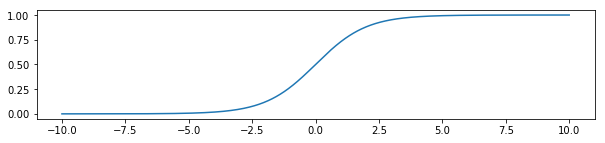

In [2]:
plt.figure(figsize = (10, 2))
z = np.linspace(-10, 10, 1000)
sigma = 1/(1 + np.exp(-z))
plt.plot(z, sigma)

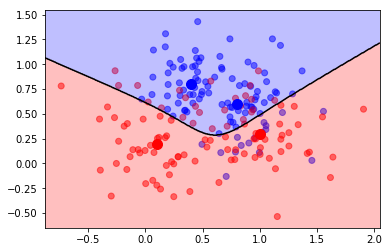

In [3]:
import mysk

X, y = mysk.generate_points(seed = 1)
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

Тестовая выборка:

In [4]:
X_test, y_test = mysk.generate_points(seed = 5)

Логистическая регрессия из scikit learn:

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

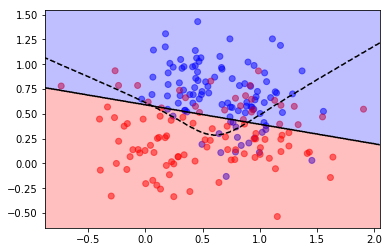

In [6]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(logistic_model)
mysk.draw_bayes()

In [7]:
err_train = np.mean(y != logistic_model.predict(X))
err_test = np.mean(y_test != logistic_model.predict(X_test))
print(err_train, err_test)

0.235 0.215


In [8]:
print(logistic_model.coef_) # Коэффициенты разделяющей гиперплоскости
print(logistic_model.intercept_)

[[-0.6296239 -3.2109123]]
[ 1.89895964]


### Логистическая регрессия: наши данные

In [9]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


In [11]:
logreg_model = LogisticRegression(C=0.1)
logreg_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

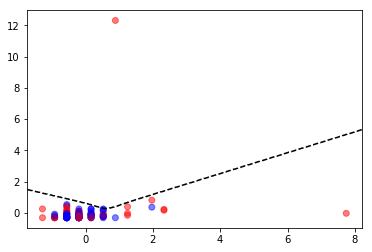

In [12]:
vX = X_train.values # taking raw values from DataFrame for visualization
mysk.draw_points(vX, intY)
mysk.draw_bayes()
# _, features_number = X.shape
# dr.draw_sep_curve_and_reshape(model=lda_model, n_dims=features_number)

#### Коэффициенты перед X в decision function

In [13]:
print(logreg_model.coef_)
_, features_number = X.shape
print("Logistic Regression coeffs. size: ", len(logreg_model.coef_[0]))
print("Features size: ", features_number)

[[  2.54008969e-01   1.58958291e-01   5.09239388e-02   6.89558817e-03
   -2.63632721e-01   8.40249901e-02   7.88787165e-02   4.09895246e-02
   -5.61658744e-02  -6.55752427e-02  -2.46038965e-01   2.53528370e-01
    4.22351318e-02  -7.49410529e-02   1.29202006e-04  -2.55091184e-02
   -8.01675847e-02   1.72790955e-01  -6.58613004e-02  -8.48479073e-02
   -5.61959343e-02   0.00000000e+00  -1.88990314e-03  -2.74389758e-02
   -1.50854311e-01   5.09239388e-02   4.92445238e-02  -5.57883026e-02
   -3.63126009e-02   9.37184846e-02   5.38418788e-02   0.00000000e+00
    5.73623871e-02   1.64225769e-01  -3.58882151e-02   8.71110309e-02
   -6.02542491e-02  -3.76661306e-02  -3.77662441e-02  -4.11295720e-02
   -3.32041241e-01]]
Logistic Regression coeffs. size:  41
Features size:  41


#### Ошибки

In [14]:
err_train = np.mean(Y_train != logreg_model.predict(X_train))
err_test = np.mean(Y_test != logreg_model.predict(X_test))
print(err_train, err_test)

0.33606557377 0.509433962264


#### Bias значение ($\beta_0$ из уравнения сигмоиды):

In [15]:
logreg_model.intercept_

array([-0.05808584])